In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt
from scipy.stats import normaltest

In [2]:
data_companys=pd.read_excel('data_final.xlsx')
symbols=list(data_companys['symbol'])

In [3]:
def rendimiento(data): return np.diff(np.log(data))

In [4]:
Cierre_symbols=yf.download(symbols,start='2019-01-01',progress=0).Close
Cierre_symbols=Cierre_symbols.dropna(axis=0)

In [5]:
Rendimientos=Cierre_symbols.apply(rendimiento,axis=0)

In [20]:
def test(Rendi,pvalue=0.05,dist='nom'):
    mu=np.mean(Rendi)
    sigma=np.var(Rendi)
    return kstest(Rendi,(mu,sigma),dist)[1]>pvalue

# Ejemplo de la prueba de hipótesis 

In [21]:
cierre_google=yf.download('GOOG.MX',start='2019-01-01',progress=0).Close
cierre_google=cierre_google.dropna(axis=0)
rendimiento_google=rendimiento(cierre_google)

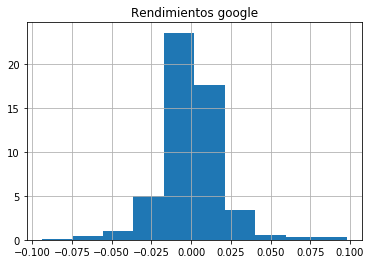

In [19]:
plt.title('Rendimientos google')
plt.hist(rendiminto_google,density=1)
plt.grid(True)
plt.show()

In [22]:
#¿Es una distribución normal?
test(rendimiento_google)

True

In [32]:
#Prediciendo los valores
mu_google=np.mean(rendimiento_google)
sigma_google=np.var(rendimiento_google)
predict=np.random.normal(mu_google,sigma_google,200)

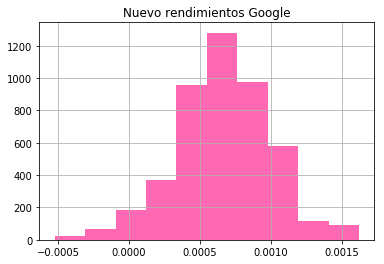

In [35]:
plt.title('Nuevo rendimientos Google')
plt.hist(predict,density=1,color='hotpink')
plt.grid(True)
plt.show()